In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    pipeline,
    metrics,
    linear_model,
    model_selection,
    tree
)
pd.set_option("display.max_colwidth", None)

In [26]:
df_raw = (
    pd.read_csv("../data/vin.csv", sep=',').iloc[:, 1:]
   
)  

### Exploration des données

In [3]:
df_raw.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Vin amer
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Vin amer
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Vin amer
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Vin amer
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Vin amer


In [5]:
df_raw.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,Vin sucré
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,Vin éuilibré
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0,Vin amer
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,Vin éuilibré
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,Vin éuilibré


In [6]:
df_raw.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
df_raw.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                           object
dtype: object

In [8]:
df_raw.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
df_raw.index

RangeIndex(start=0, stop=178, step=1)

In [23]:
df_raw.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,Vin sucré
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,Vin sucré
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,Vin sucré
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,Vin sucré
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,Vin sucré


In [24]:
df_raw.describe().T.round(3).style.background_gradient()
 

,count,mean,std,min,25%,50%,75%,max
alcohol,178.000000,13.001000,0.812000,11.030000,12.362000,13.050000,13.678000,14.830000
malic_acid,178.000000,2.336000,1.117000,0.740000,1.602000,1.865000,3.082000,5.800000
ash,178.000000,2.367000,0.274000,1.360000,2.210000,2.360000,2.558000,3.230000
alcalinity_of_ash,178.000000,19.495000,3.340000,10.600000,17.200000,19.500000,21.500000,30.000000
magnesium,178.000000,99.742000,14.282000,70.000000,88.000000,98.000000,107.000000,162.000000
total_phenols,178.000000,2.295000,0.626000,0.980000,1.742000,2.355000,2.800000,3.880000
flavanoids,178.000000,2.029000,0.999000,0.340000,1.205000,2.135000,2.875000,5.080000
nonflavanoid_phenols,178.000000,0.362000,0.124000,0.130000,0.270000,0.340000,0.438000,0.660000
proanthocyanins,178.000000,1.591000,0.572000,0.410000,1.250000,1.555000,1.950000,3.580000
color_intensity,178.000000,5.058000,2.318000,1.280000,3.220000,4.690000,6.200000,13.000000


### Graph

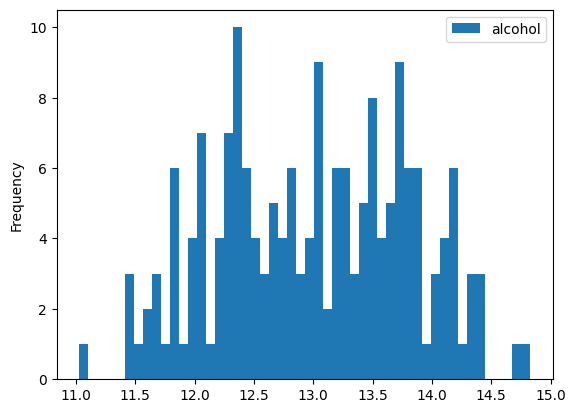

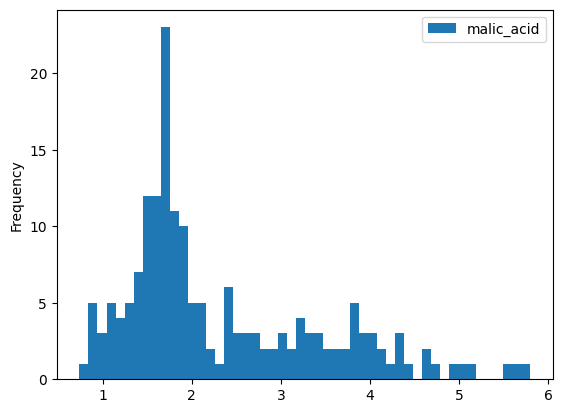

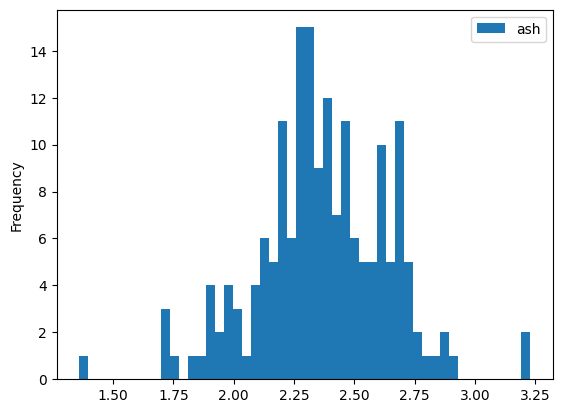

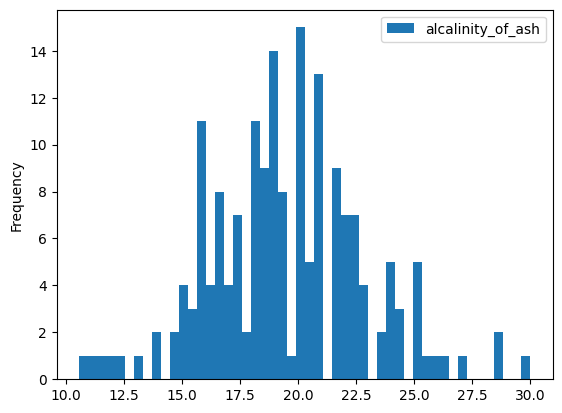

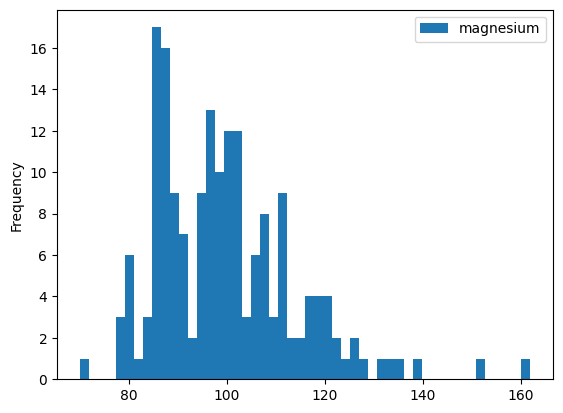

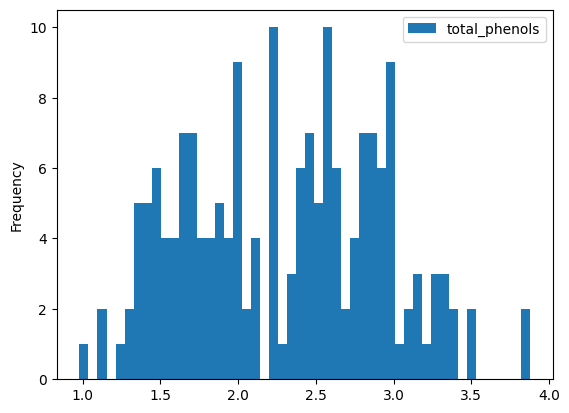

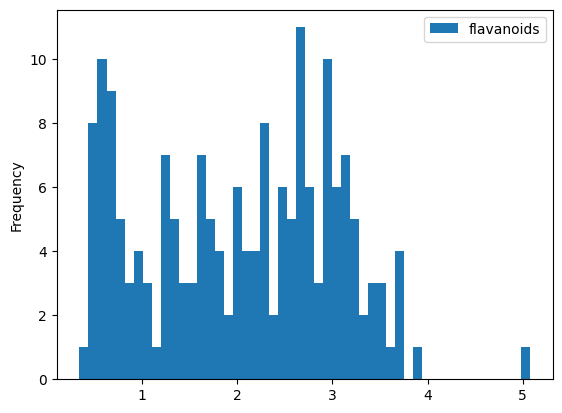

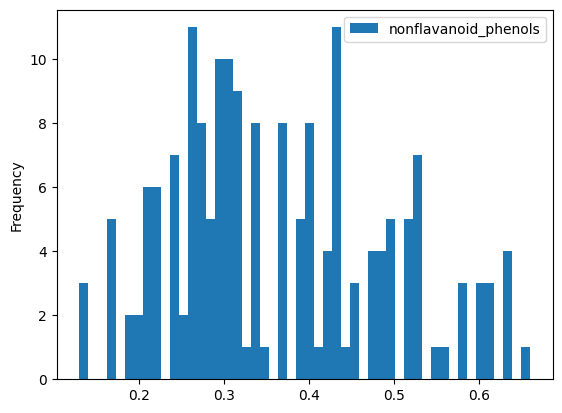

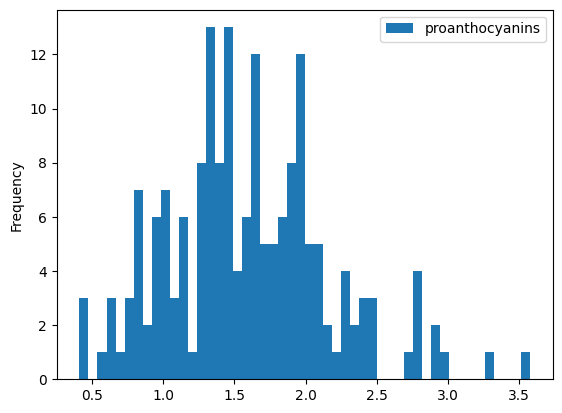

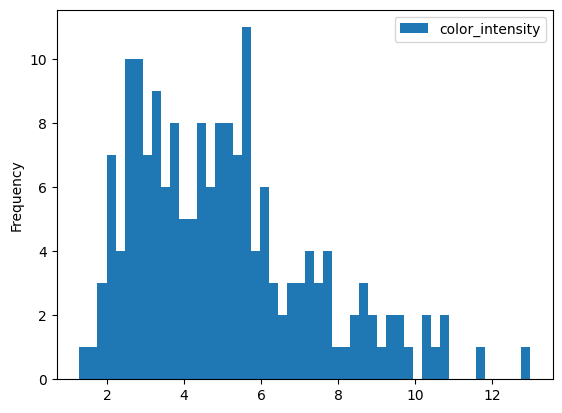

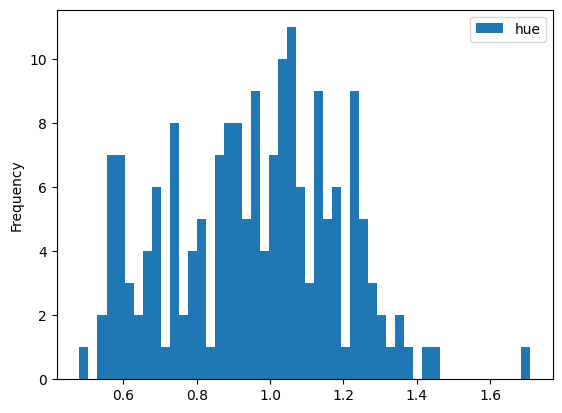

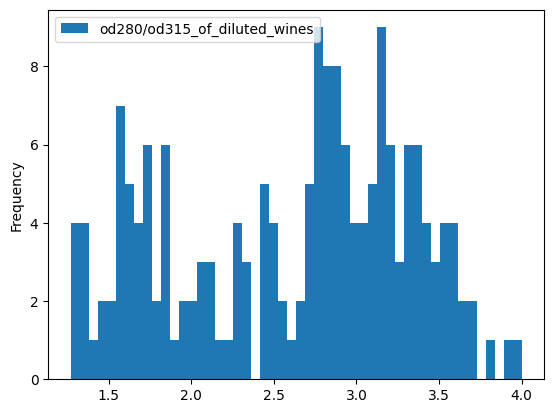

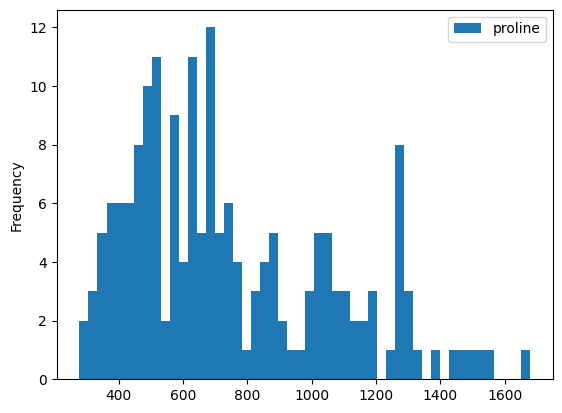

In [14]:
num_cols = [col for col in df_raw.columns if col !="target"]

for col in num_cols:
    df_raw[[col]].plot.hist(bins=50)
    plt.show()

<Axes: >

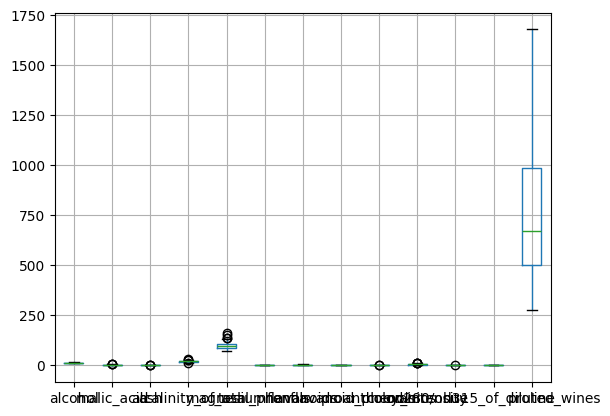

In [ ]:
# (
#     df_raw
#     .boxplot()
# )

<Axes: xlabel='target'>

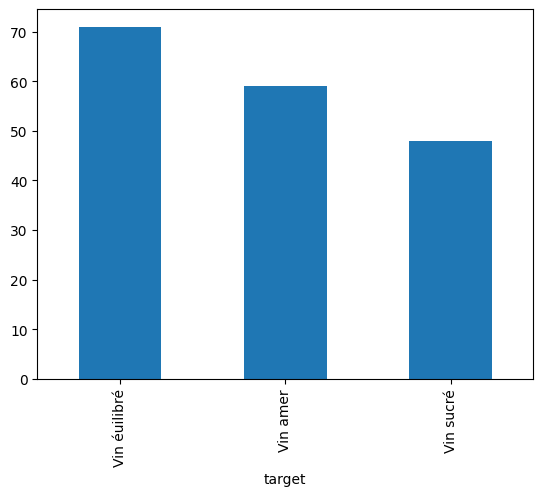

In [16]:
df_raw["target"].value_counts().plot.bar()

In [33]:
(
    df_raw["target"]
    .value_counts(
        normalize=True
    )
)

target
1    0.398876
2    0.331461
0    0.269663
Name: proportion, dtype: float64

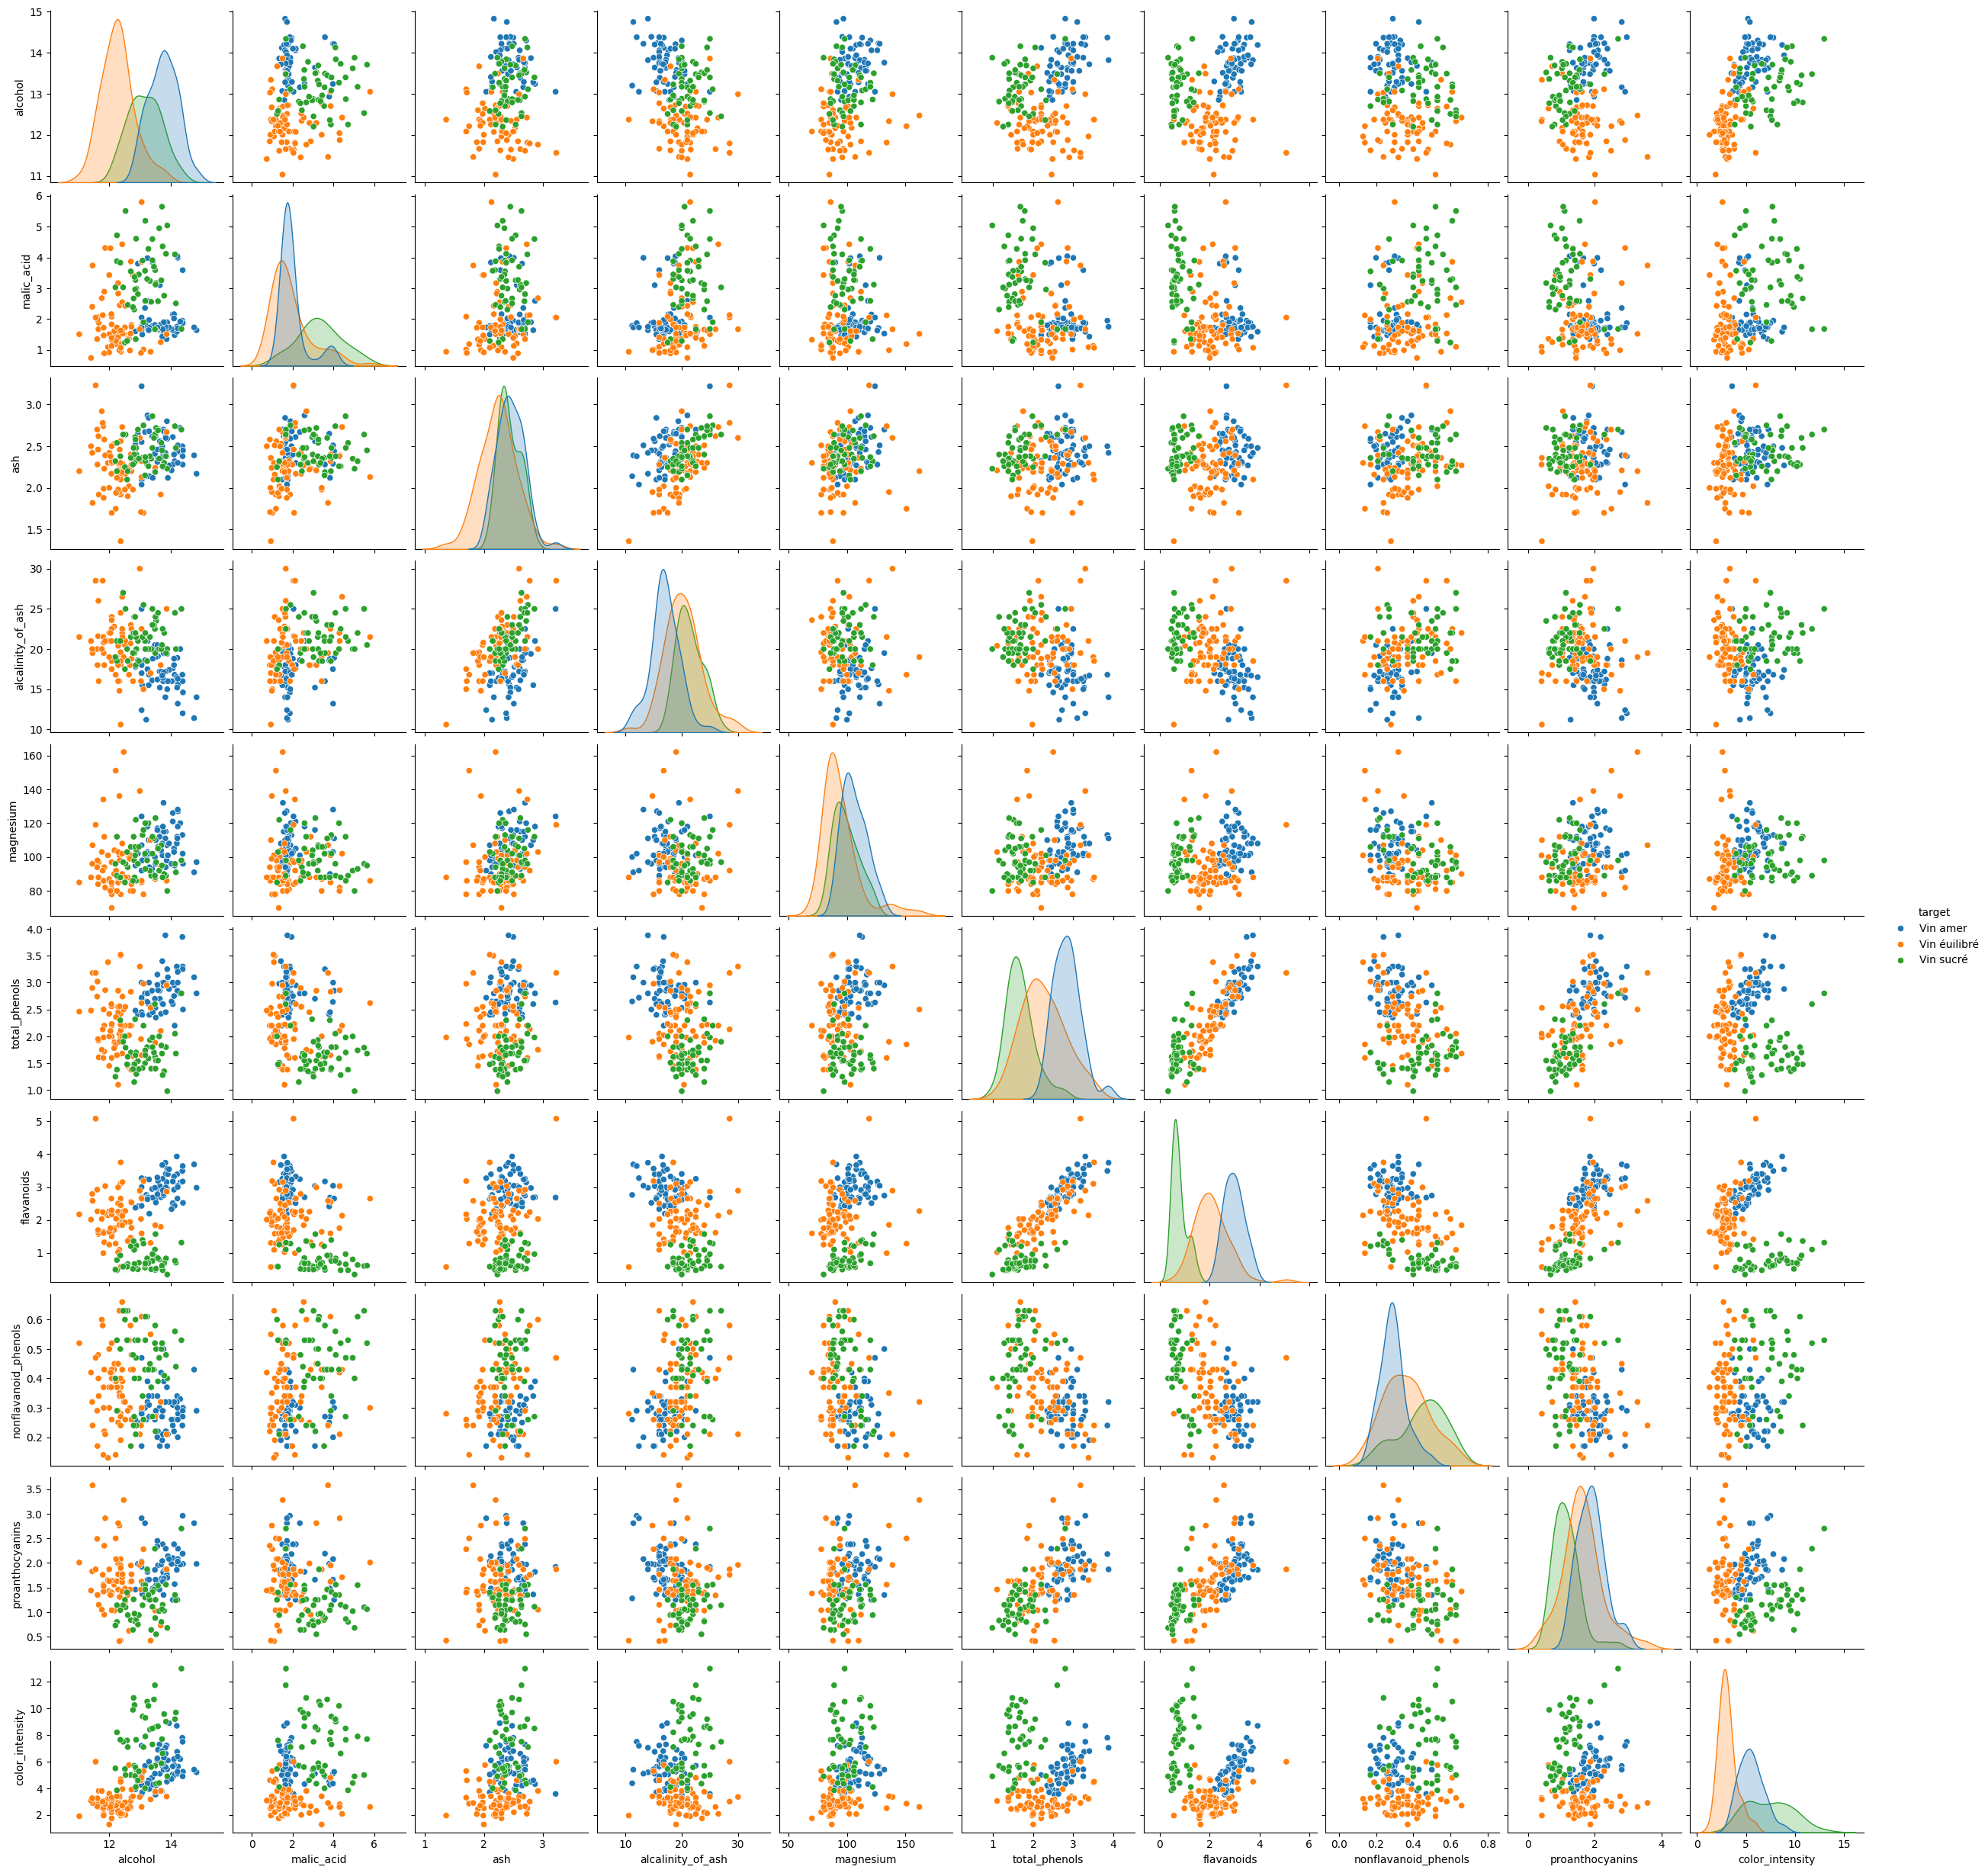

In [21]:
pairplot_cols = num_cols[:10]
pairplot_cols.append("target")

sns.pairplot(df_raw[pairplot_cols], hue="target")

### Préparation des données

#### Préparation de la target

In [27]:
df_raw["target"] = (
    df_raw["target"]
    .map({'Vin sucré': 0, 'Vin éuilibré':1, 'Vin amer':2})
)

#### Division du jeu de données

In [126]:
target = ["target"]
features = [col for col in df_raw.columns if col not in target]

X_train, X_test, y_train, y_test = (
    model_selection.train_test_split(
        df_raw[features],
        df_raw[target],
        test_size=0.2,
        random_state=13
    )
)

In [127]:
y_train["target"].value_counts(normalize=True)

target
1    0.394366
2    0.330986
0    0.274648
Name: proportion, dtype: float64

### Feature Engineering

##### Outliers

In [ ]:
X_train = (
    X_train
    # .loc[lambda df: df["symmetry_worst"]<0.6]
    # .loc[lambda df: df["concavity_worst"]<1]
)

y_train = (
    y_train
    # .loc[X_train.index]
)

##### Sélection de features

In [ ]:
# features_to_remove = [
#     "perimeter_mean",
#     "area_mean",
#     "perimeter_se",
#     "area_se",
#     "perimeter_worst",
#     "area_worst"
# ]

# selected_features = [col for col in X_train.columns if col not in features_to_remove]

# feature_selection = compose.ColumnTransformer(transformers=[
#         ('select', 'passthrough', selected_features),
#     ])

In [ ]:
# (
#     pd.DataFrame(
#         feature_selection.fit_transform(X_train),
#         columns=selected_features
#     )
# )

#### Normalisation des features

In [ ]:
# pipe = pipeline.Pipeline([
#     ("feature_selection", feature_selection),
#     ('std_scaler', preprocessing.StandardScaler())]
# )

In [ ]:
# (
#     pd.DataFrame(
#         pipe.fit_transform(X_train),
#         columns=selected_features
#     )
# )

## Entraînement d'un arbre de décision

In [128]:
pipe = pipeline.Pipeline([
    # ("feature_selection", feature_selection),
    # ('std_scaler', preprocessing.StandardScaler()),
    ('decision_tree', tree.DecisionTreeClassifier())]
)

In [129]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('decision_tree', DecisionTreeClassifier())])

## Evaluation

In [130]:
print("Accuracy on train set =", pipe.score(X_train,y_train))
print("Accuracy on test set =", pipe.score(X_test,y_test))

Accuracy on train set = 1.0
Accuracy on test set = 0.8888888888888888


In [70]:
df_raw.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0,0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,0
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,2
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,0
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380.0,1
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0,1


In [78]:
type(pipe[-1])

sklearn.tree._classes.DecisionTreeClassifier

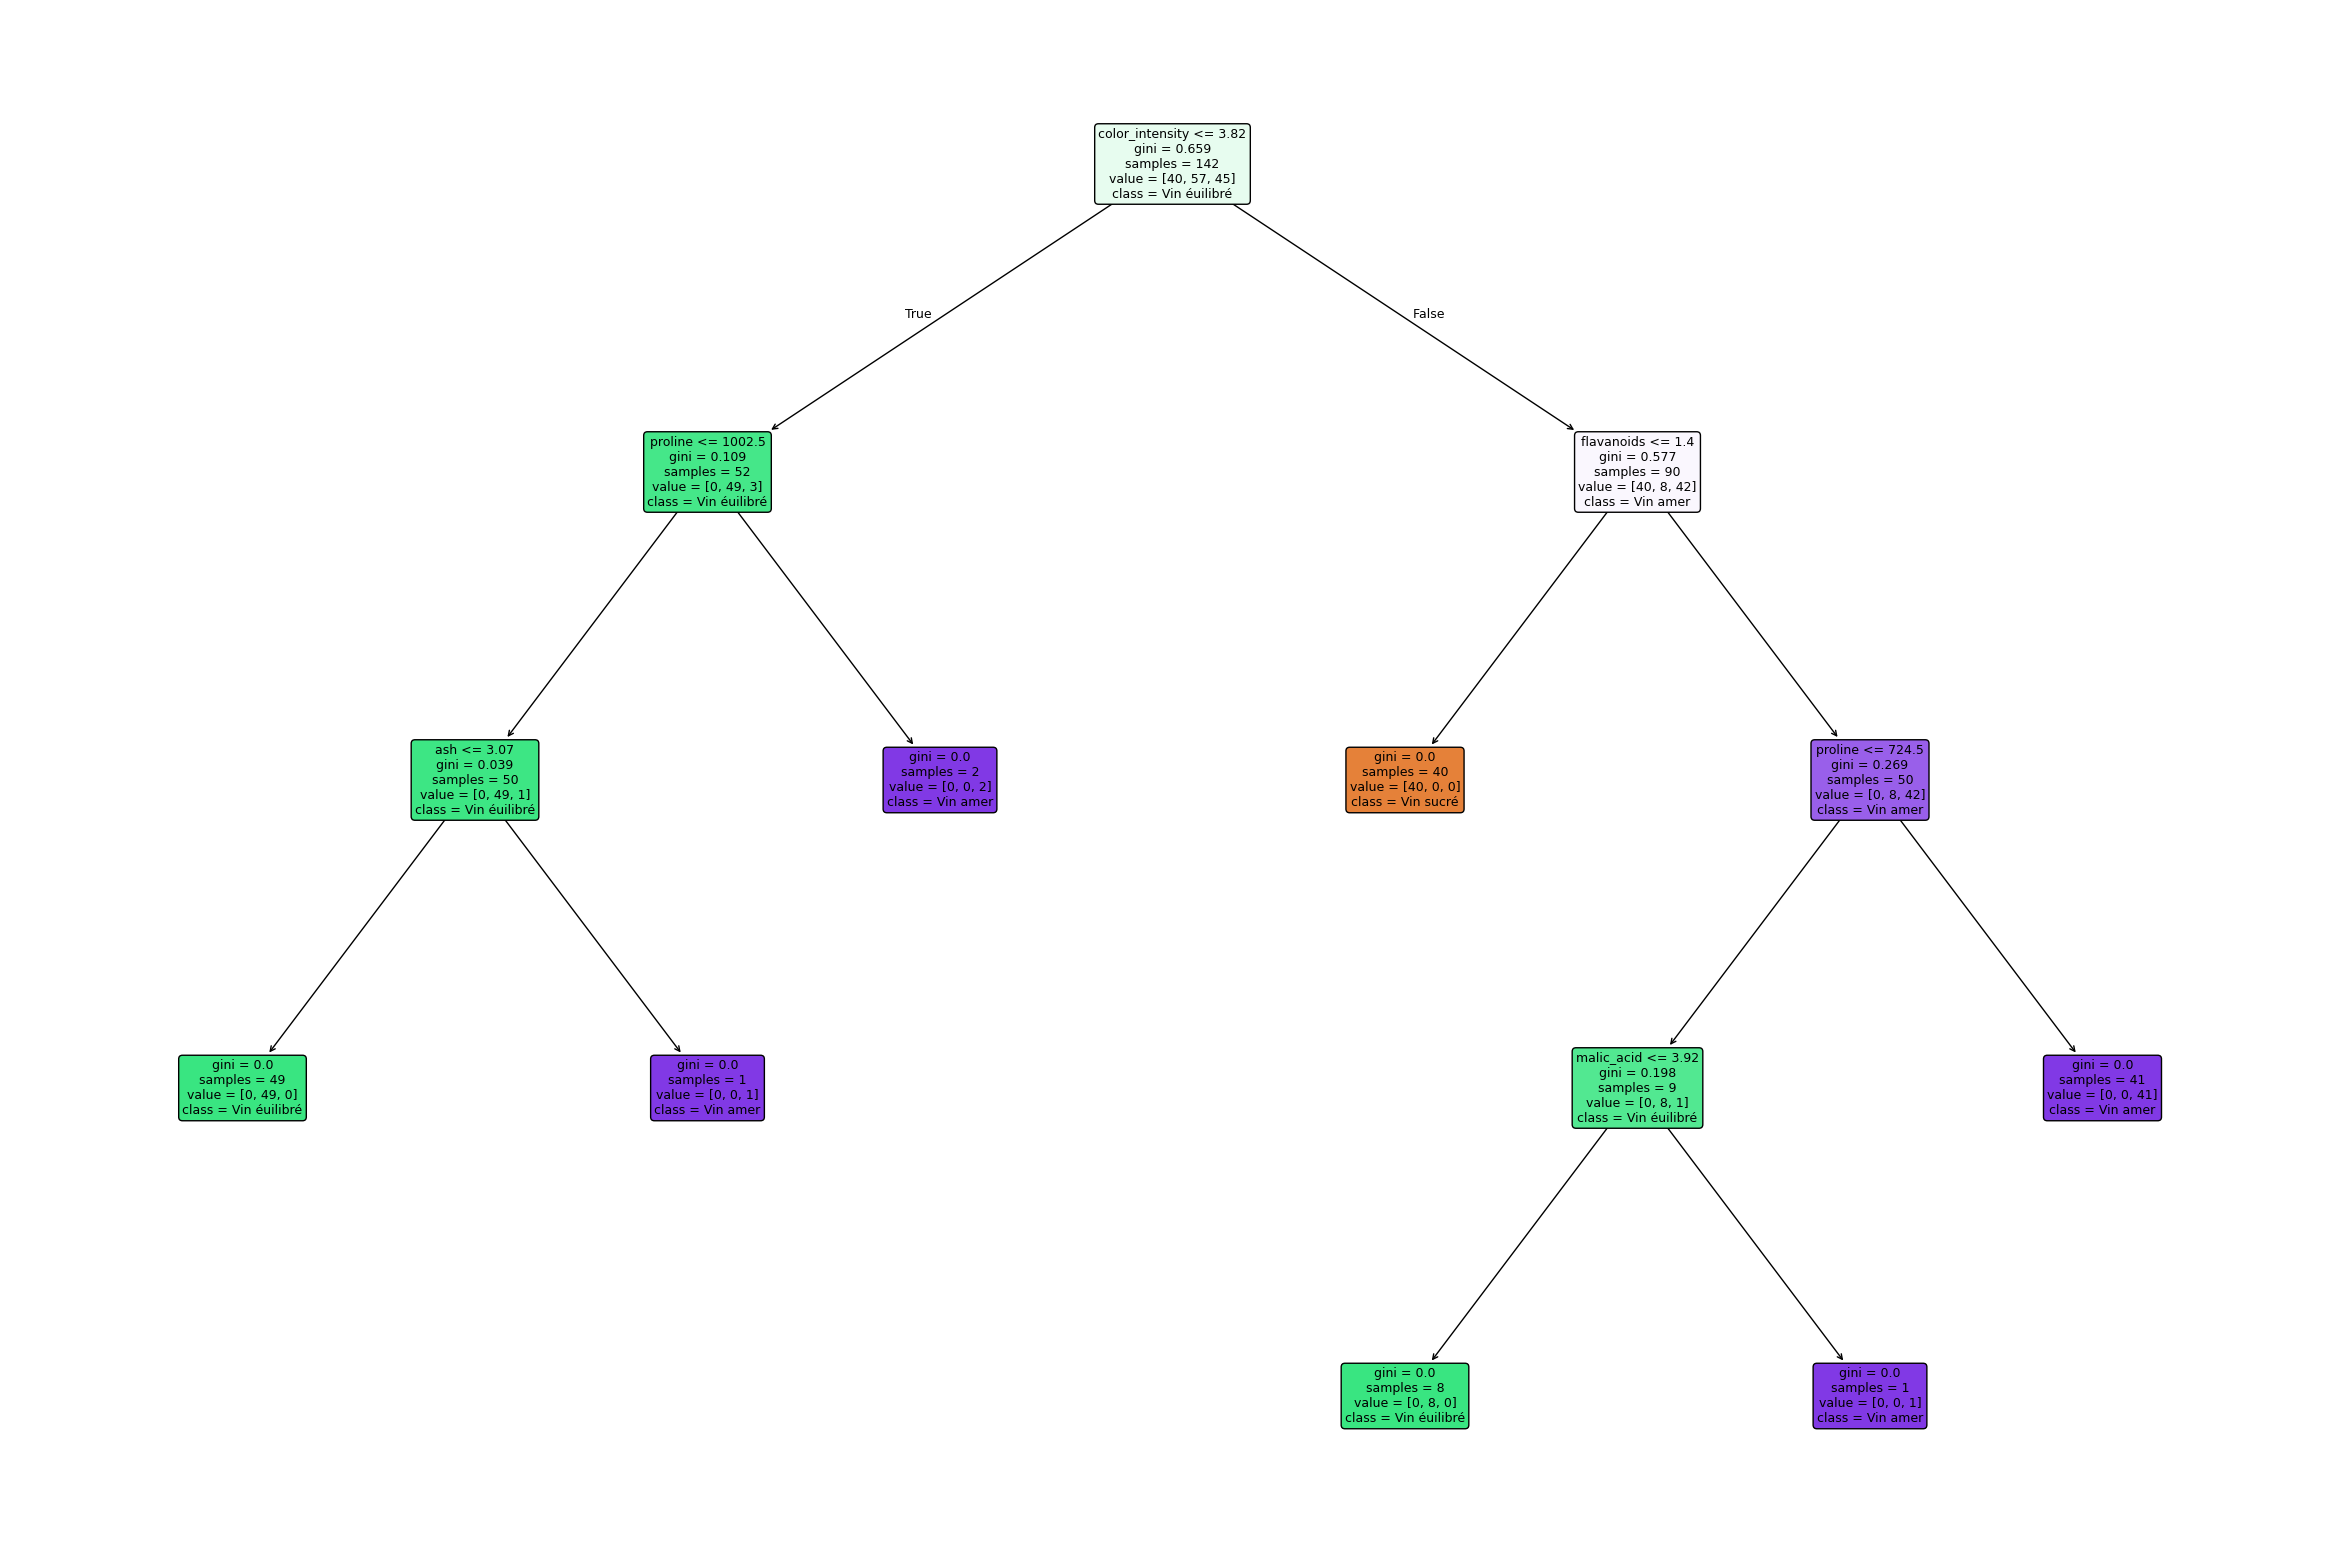

In [114]:
plt.figure(figsize=(30,20))
tree.plot_tree(
    pipe[-1],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names=["Vin sucré","Vin éuilibré", "Vin amer"],
    fontsize=9
)
plt.savefig("tree_raw.png",bbox_inches="tight")


#### Matrice

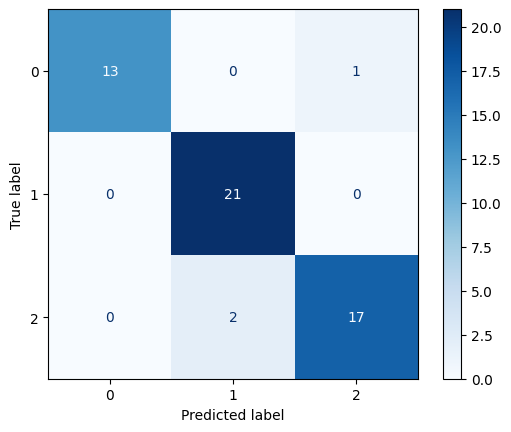

In [99]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test), cmap="Blues")

### Rapport de classification

In [115]:
print(metrics.classification_report(y_train, pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        45

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [116]:
print(metrics.classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93        14
           2       1.00      0.93      0.96        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

